In [15]:
import pandas as pd
import os
import sweetviz as sv
import geopandas as gpd
from shapely import wkt
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import geodatasets
from shapely.geometry import Point
from geopy.geocoders import Nominatim
import warnings
import plotly.express as px
from geopy.geocoders import ArcGIS
import geopandas as gpd
import numpy as np
import re
warnings.filterwarnings('ignore')

In [16]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Project Management/Head Competition/Code/Datasets')

In [17]:
os.listdir('.')

['20240117-2024-Facilities-Details-FCI.xlsx',
 'city_451_BCCAQv2_RCP85_annual_plus30_ensemble.csv',
 'CoH-CFEM-2023-Facilities-Details.xlsx',
 'db1_cleaned.csv',
 'db2_cleaned.csv',
 'facilities_wlocation.csv',
 'Metadata',
 'Ward_Boundaries.geojson',
 'Ward_Boundaries.json',
 'Ward_Boundaries_json.json',
 'weather_databases']

In [18]:
df=pd.read_csv("db1_cleaned.csv")
df.head()

,Unnamed: 0,Asset Name,Asset Type,Asset Address,Asset Size SQF,Asset Date Built,2023 FCI Rating
0,2,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411.0,1986-04-26,0.066459
1,3,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954.0,1973-01-02,0.098895
2,4,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72.0,2011-01-01,0.000000
3,5,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067.0,1982-01-02,0.012063
4,6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112.0,1996-01-02,0.082996


In [19]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [20]:
df_weather=pd.read_csv("weather_databases/climate_data.csv")
df_weather.head()

,Unnamed: 0,Asset Name,Asset Name: Address,Asset Name: Size,Asset Name: Date Built,Custom: Assessment Date,formattted_address,latitude,longitude,formatted_address,...,Shape__Length,year,dry_days_hxmax40_mean,freeze_thaw_mean,ice_days_mean,max_temp_mean_mean,minimum_temp_mean_mean,tg_mean_6_mean,total_precipitation_mean,wet_days_plus20mm_mean
0,0,703 HIGHWAY 8 (ALECTRA UTILITIES),703 HIGHWAY 8,31411.0,1986-04-26,Model,"703 highway 8, Hamilton, Ontario",43.212915,-79.698300,"703 Hwy 8, Stoney Creek, Ontario, L8E 5J6",...,31057.20076,1986.0,1.769231,55.217949,42.128205,13.832308,5.109487,9.473077,828.291795,6.756410
1,1,ALEXANDER PARK - FIELDHOUSE,201 WHITNEY AVENUE,1954.0,1973-01-02,2017,"201 whitney avenue, Hamilton, Ontario",43.252779,-79.927670,"201 Whitney Ave, Hamilton, Ontario, L8S 2G6",...,27766.73053,1973.0,1.480769,64.413462,48.788462,13.399615,3.875962,8.634231,837.003846,6.951923
2,2,ALEXANDER PARK WADING POOL UTILITY BUILDING,201 WHITNEY AVENUE,72.0,2011-01-01,2017,"201 whitney avenue, Hamilton, Ontario",43.252779,-79.927670,"201 Whitney Ave, Hamilton, Ontario, L8S 2G6",...,27766.73053,2011.0,2.857143,61.214286,40.500000,14.232857,4.777857,9.498571,854.908571,7.535714
3,3,ANCASTER AQUATIC CENTRE (P),47 MEADOWBROOK DRIVE,19067.0,1982-01-02,2020,"47 meadowbrook drive, Hamilton, Ontario",43.215197,-80.006172,"47 Meadowbrook Dr, Ancaster, Ontario, L9G 4Y3",...,83212.28066,1982.0,1.604651,65.383721,49.755814,13.439070,3.789070,8.612326,852.625116,7.104651
4,4,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,385 JERSEYVILLE ROAD WEST,1112.0,1996-01-02,2011,"385 jerseyville road west, Hamilton, Ontario",43.216734,-80.007322,"385 Jerseyville Rd W, Ancaster, Ontario, L9G 3L5",...,83212.28066,1996.0,2.103448,64.051724,46.465517,13.804828,4.166897,8.983448,856.750690,7.310345


In [21]:
subset_climate=df_weather[[
    "Asset Name",
    "Asset Name: Address",
    "Asset Name: Size",
    "dry_days_hxmax40_mean",	
    "freeze_thaw_mean",	
    "ice_days_mean",	
    "max_temp_mean_mean",	
    "minimum_temp_mean_mean",	
    "tg_mean_6_mean",	
    "total_precipitation_mean",	
    "wet_days_plus20mm_mean"
    ]]

In [22]:
df_wclimate= df.merge(subset_climate,
         left_on=["Asset Name","Asset Address","Asset Size SQF"],
         right_on=["Asset Name","Asset Name: Address","Asset Name: Size"],
         how="left"
         ).drop(columns=["Asset Name: Address","Asset Name: Size"])

In [25]:
facilities=pd.read_csv("facilities_wlocation.csv")
facilities.head()

,Unnamed: 0,Asset Name,Asset Name: Address,Asset Name: Size,Asset Name: Date Built,Custom: Assessment Date,formattted_address,latitude,longitude,formatted_address,...,index_right,OBJECTID,WARD,COUNCILLOR_NAME,PHONE,EMAIL,WEBSITE,PICTURE_URL,Shape__Area,Shape__Length
0,2,703 HIGHWAY 8 (ALECTRA UTILITIES),703 HIGHWAY 8,31411.0,1986-04-26,Model,"703 highway 8, Hamilton, Ontario",43.212915,-79.698300,"703 Hwy 8, Stoney Creek, Ontario, L8E 5J6",...,9.0,10.0,10,Jeff Beattie,905-546-2701,jeff.beattie@hamilton.ca,https://www.hamilton.ca/city-council/council-c...,https://www.hamilton.ca/sites/default/files/st...,3.139529e+07,31057.20076
1,3,ALEXANDER PARK - FIELDHOUSE,201 WHITNEY AVENUE,1954.0,1973-01-02,2017,"201 whitney avenue, Hamilton, Ontario",43.252779,-79.927670,"201 Whitney Ave, Hamilton, Ontario, L8S 2G6",...,0.0,1.0,1,Maureen Wilson,905-546-2416,ward1@hamilton.ca,https://www.hamilton.ca/city-council/council-c...,https://www.hamilton.ca/sites/default/files/st...,1.532535e+07,27766.73053
2,4,ALEXANDER PARK WADING POOL UTILITY BUILDING,201 WHITNEY AVENUE,72.0,2011-01-01,2017,"201 whitney avenue, Hamilton, Ontario",43.252779,-79.927670,"201 Whitney Ave, Hamilton, Ontario, L8S 2G6",...,0.0,1.0,1,Maureen Wilson,905-546-2416,ward1@hamilton.ca,https://www.hamilton.ca/city-council/council-c...,https://www.hamilton.ca/sites/default/files/st...,1.532535e+07,27766.73053
3,5,ANCASTER AQUATIC CENTRE (P),47 MEADOWBROOK DRIVE,19067.0,1982-01-02,2020,"47 meadowbrook drive, Hamilton, Ontario",43.215197,-80.006172,"47 Meadowbrook Dr, Ancaster, Ontario, L9G 4Y3",...,11.0,12.0,12,Craig Cassar,905-546-2704,craig.cassar@hamilton.ca,https://www.hamilton.ca/city-council/council-c...,https://www.hamilton.ca/sites/default/files/st...,2.976397e+08,83212.28066
4,6,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,385 JERSEYVILLE ROAD WEST,1112.0,1996-01-02,2011,"385 jerseyville road west, Hamilton, Ontario",43.216734,-80.007322,"385 Jerseyville Rd W, Ancaster, Ontario, L9G 3L5",...,11.0,12.0,12,Craig Cassar,905-546-2704,craig.cassar@hamilton.ca,https://www.hamilton.ca/city-council/council-c...,https://www.hamilton.ca/sites/default/files/st...,2.976397e+08,83212.28066


In [29]:
final_df=df_wclimate.merge(facilities[["Asset Name","WARD"]],on="Asset Name")
final_df.head()

,Asset Name,Asset Type,Asset Address,Asset Size SQF,Asset Date Built,2023 FCI Rating,dry_days_hxmax40_mean,freeze_thaw_mean,ice_days_mean,max_temp_mean_mean,minimum_temp_mean_mean,tg_mean_6_mean,total_precipitation_mean,wet_days_plus20mm_mean,WARD
0,703 HIGHWAY 8 (ALECTRA UTILITIES),Work Yards & Maintenance,703 HIGHWAY 8,31411.0,1986-04-26,0.066459,1.769231,55.217949,42.128205,13.832308,5.109487,9.473077,828.291795,6.756410,10
1,ALEXANDER PARK - FIELDHOUSE,Park Facilities - Public Use,201 WHITNEY AVENUE,1954.0,1973-01-02,0.098895,1.480769,64.413462,48.788462,13.399615,3.875962,8.634231,837.003846,6.951923,1
2,ALEXANDER PARK WADING POOL UTILITY BUILDING,Outdoor Pools,201 WHITNEY AVENUE,72.0,2011-01-01,0.000000,2.857143,61.214286,40.500000,14.232857,4.777857,9.498571,854.908571,7.535714,1
3,ANCASTER AQUATIC CENTRE (P),Indoor Pools,47 MEADOWBROOK DRIVE,19067.0,1982-01-02,0.012063,1.604651,65.383721,49.755814,13.439070,3.789070,8.612326,852.625116,7.104651,12
4,ANCASTER COMMUNITY CENTRE PARK - FIELDHOUSE,Park Facilities - Public Use,385 JERSEYVILLE ROAD WEST,1112.0,1996-01-02,0.082996,2.103448,64.051724,46.465517,13.804828,4.166897,8.983448,856.750690,7.310345,12


                                             |          | [  0%]   00:00 -> (? left)


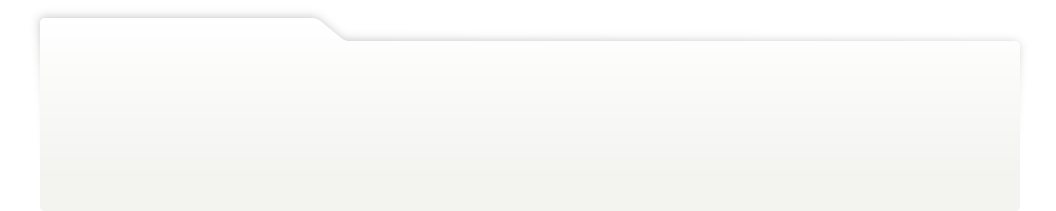
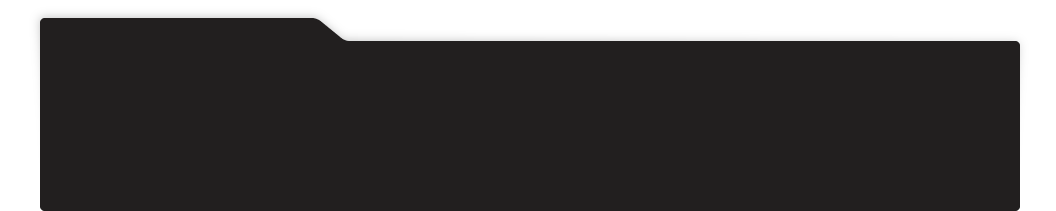
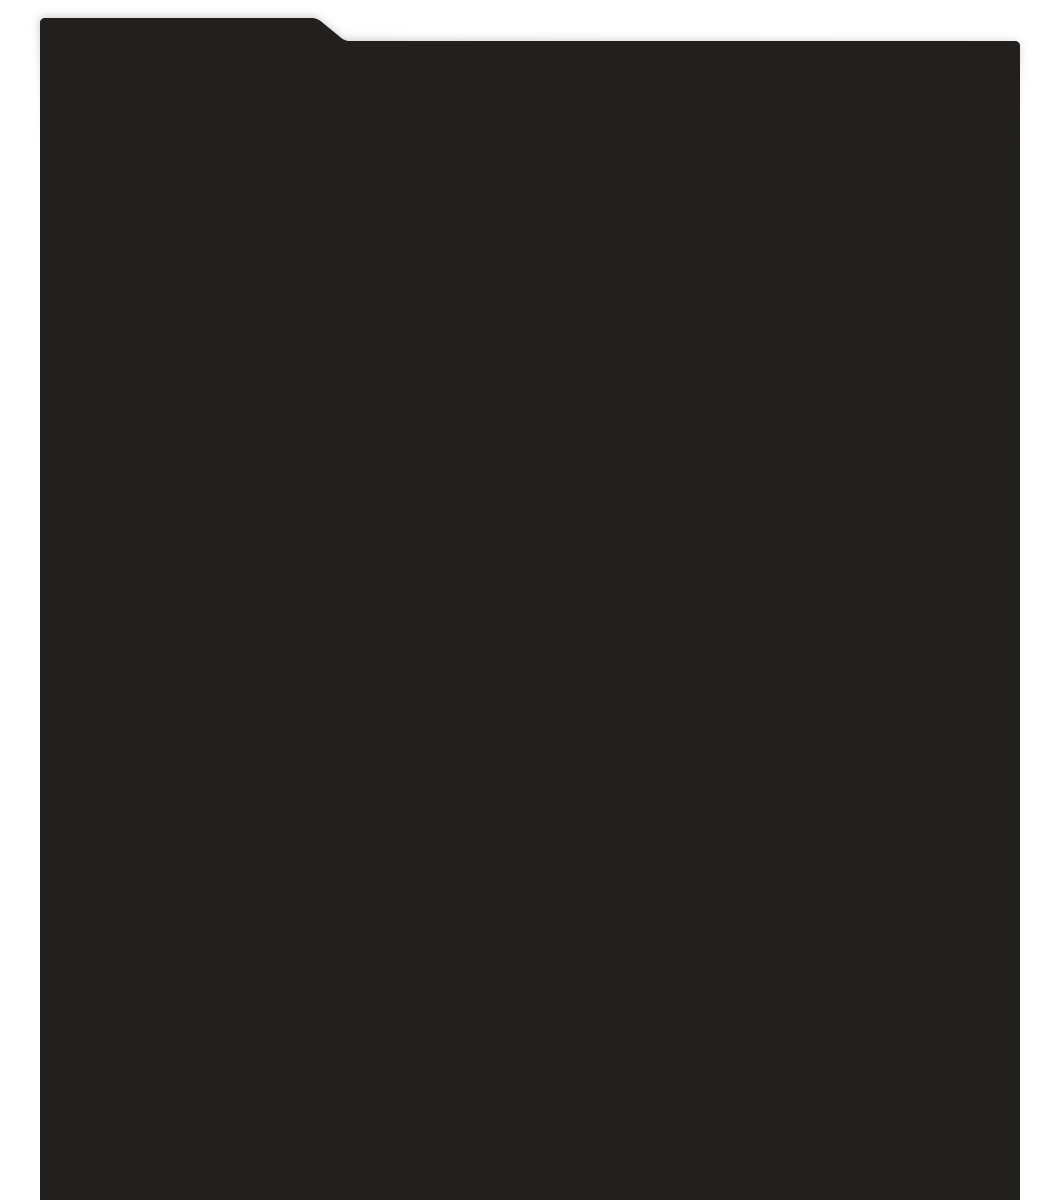
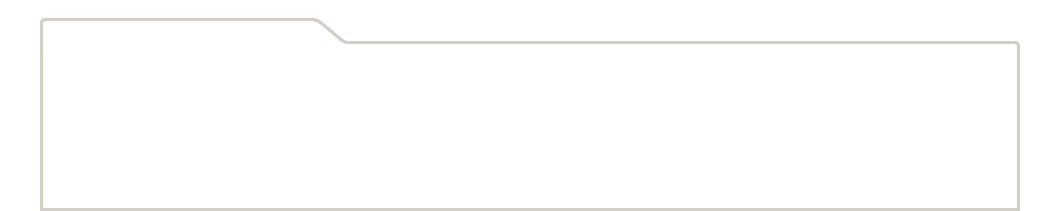
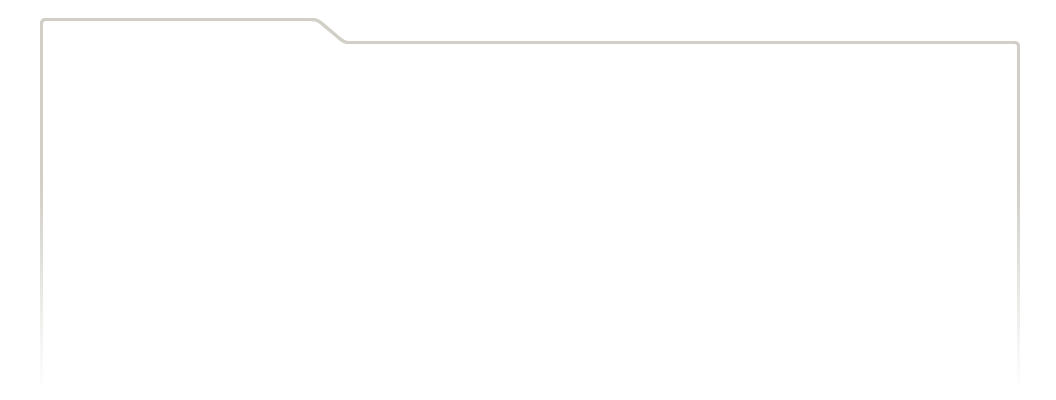
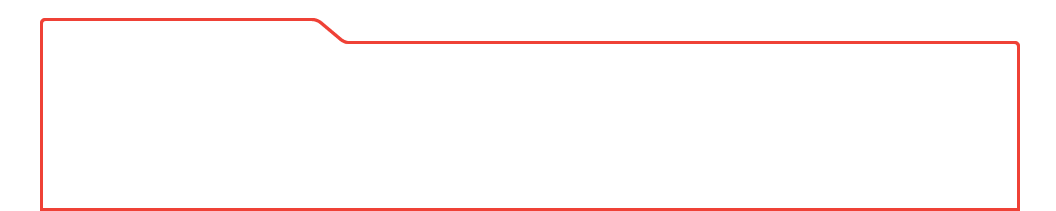
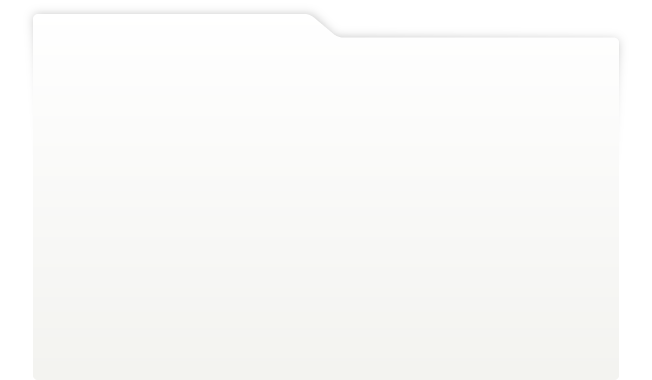
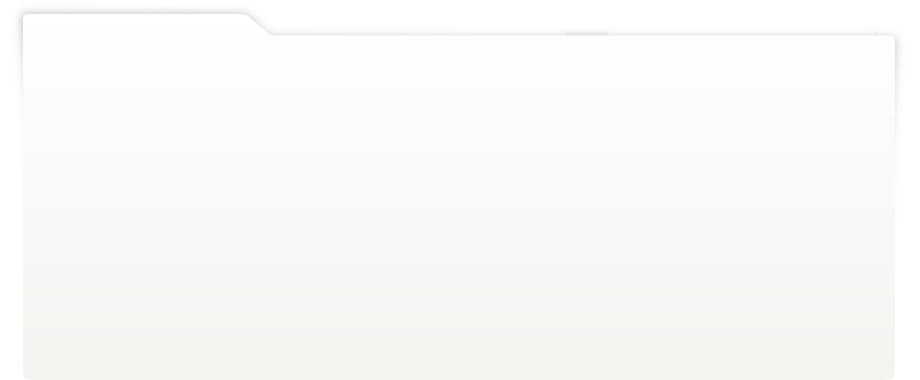
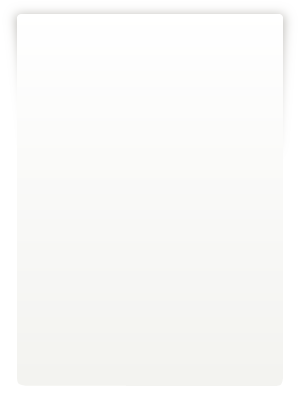
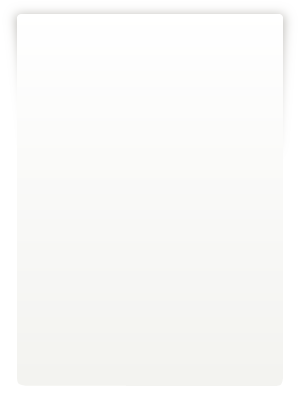
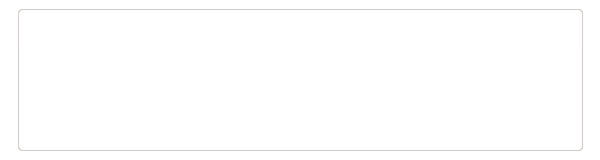
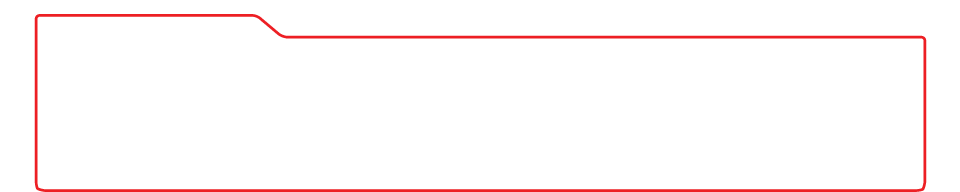
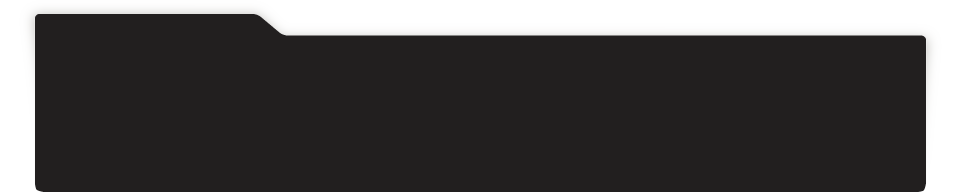
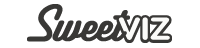
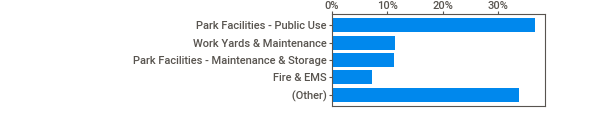
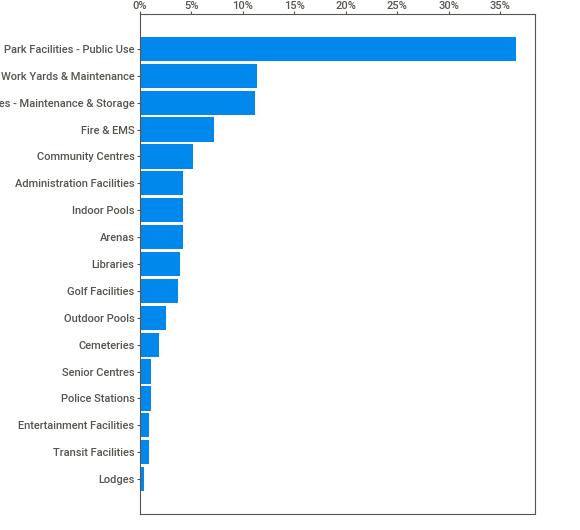
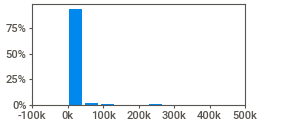
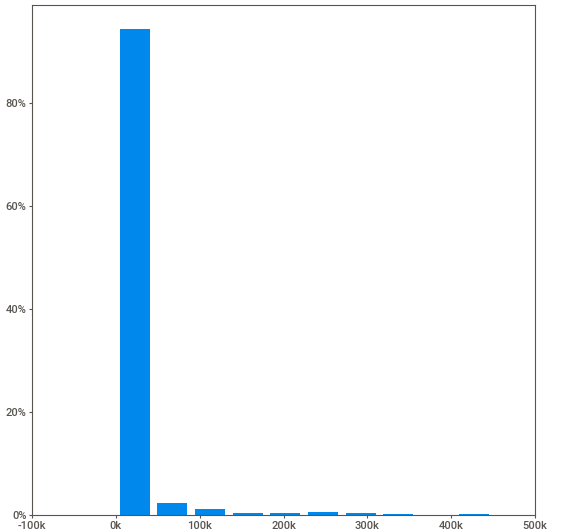
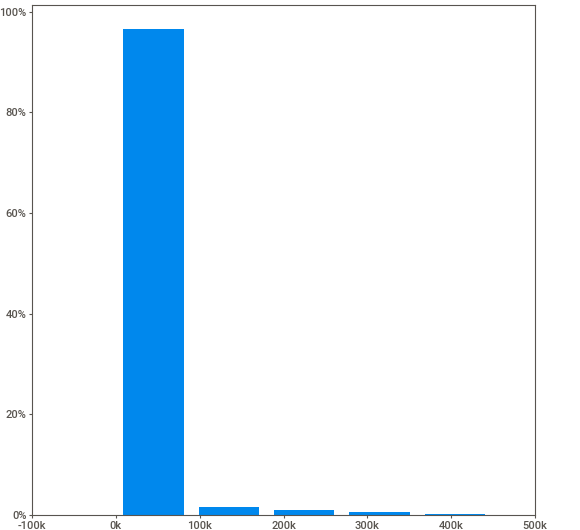
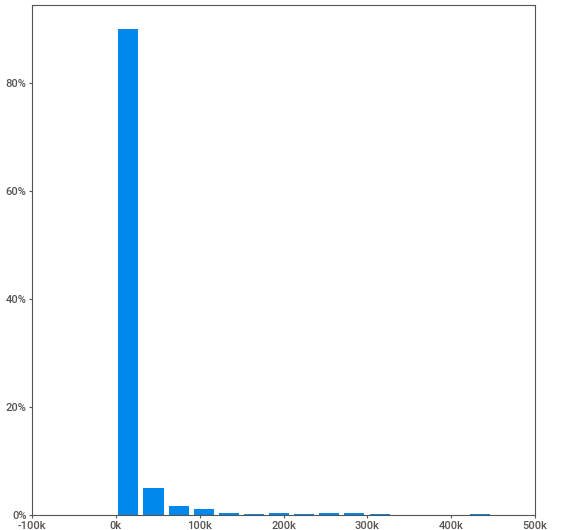
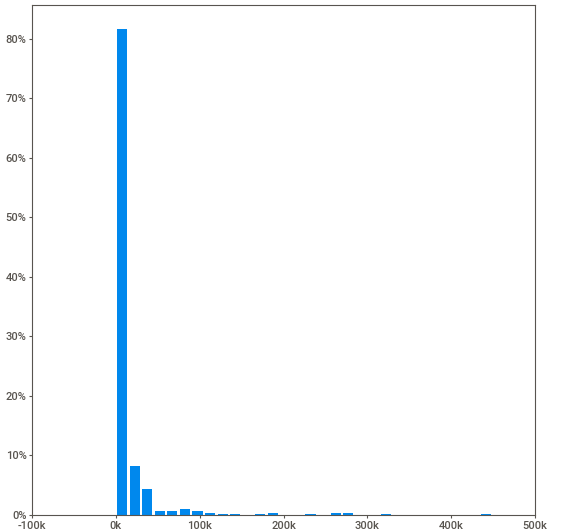
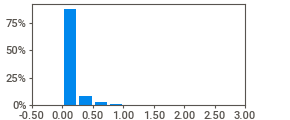
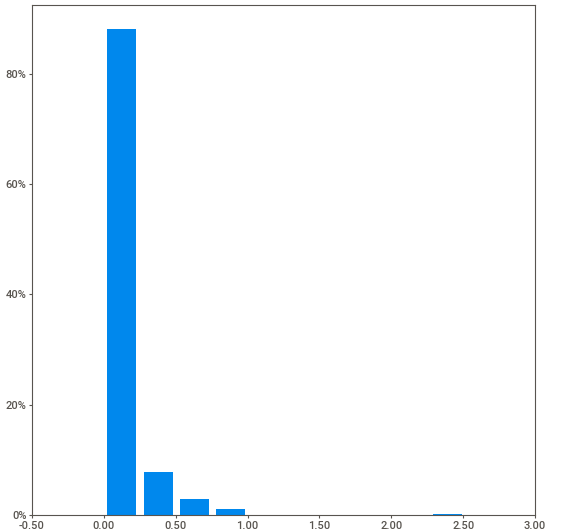
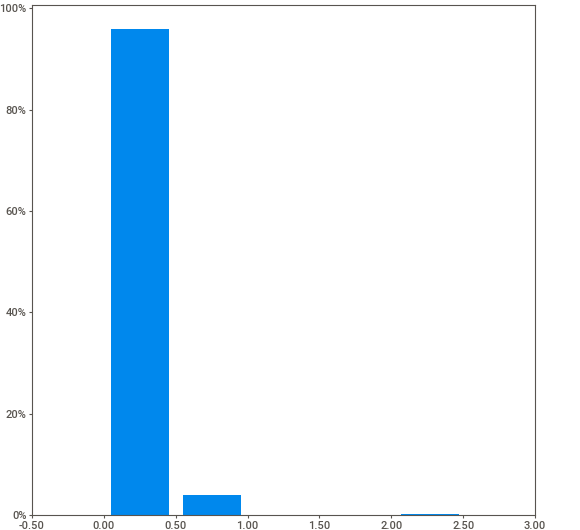
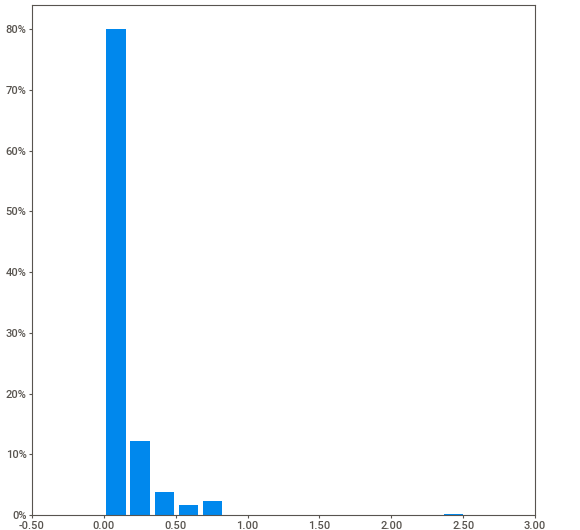
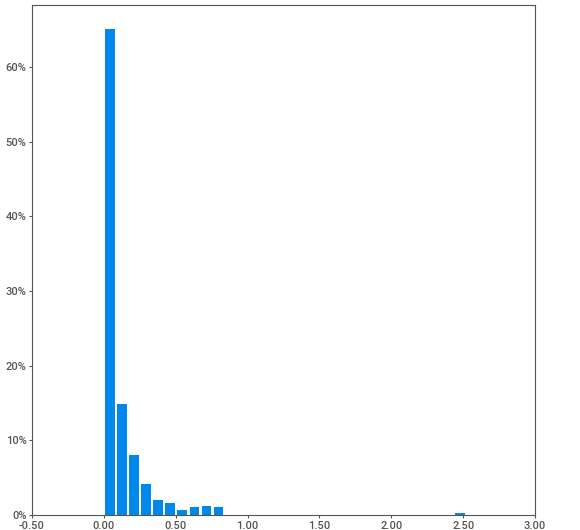
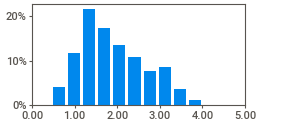
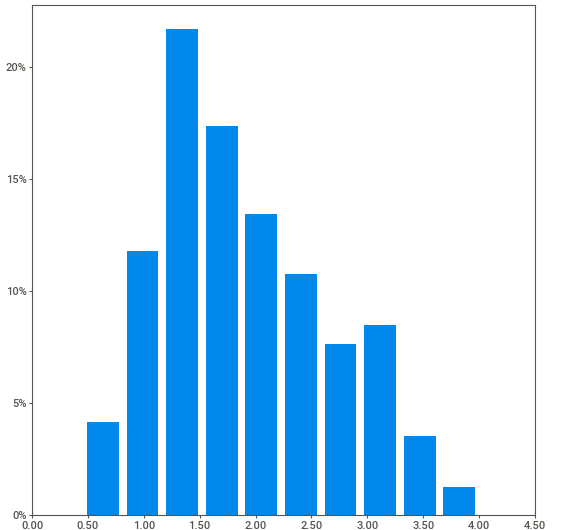
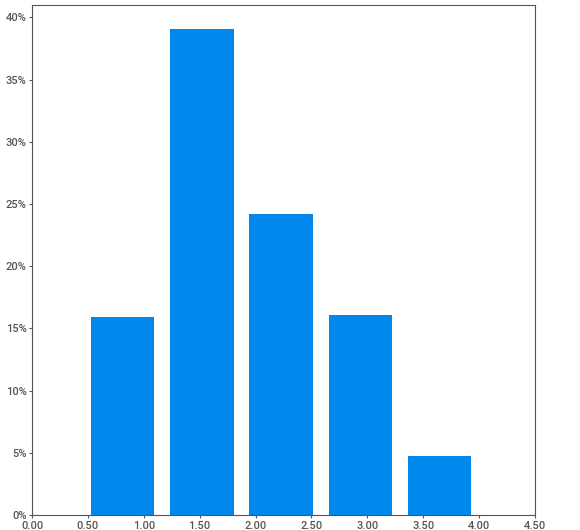
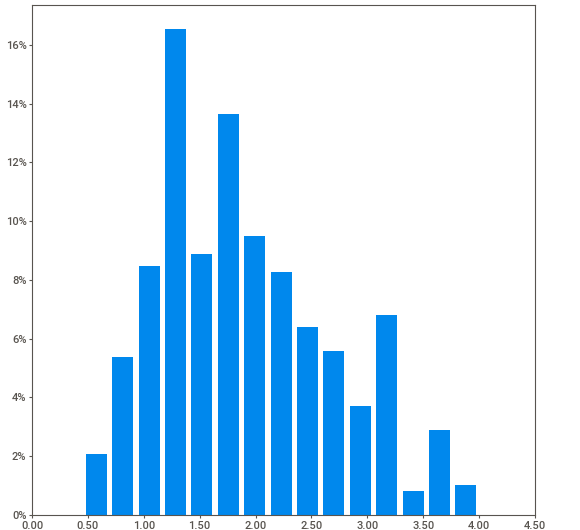
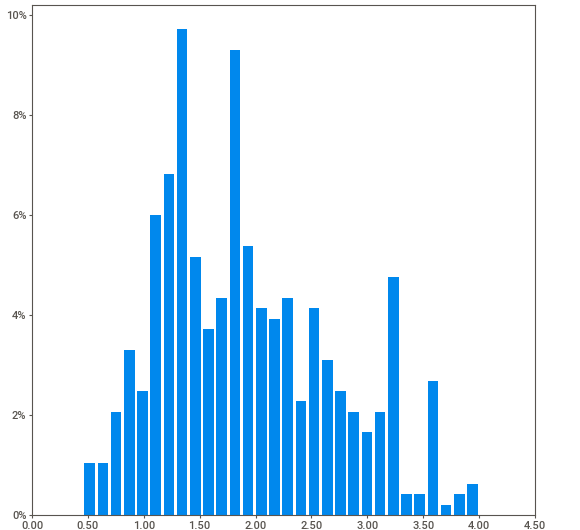
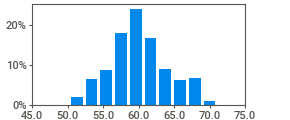
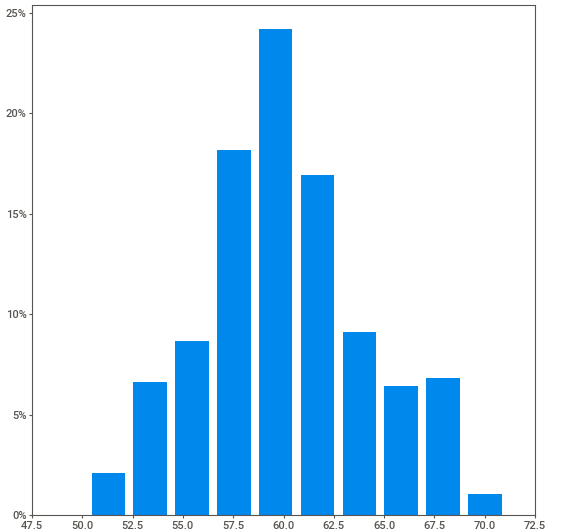
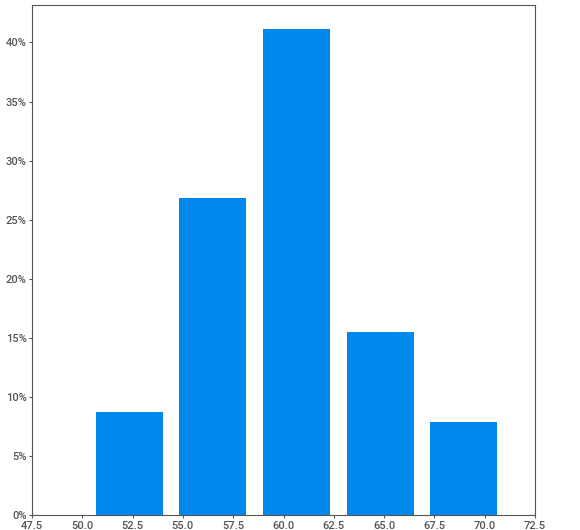
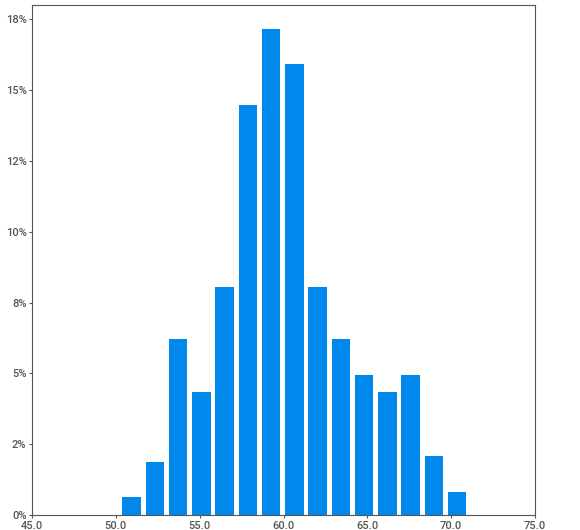
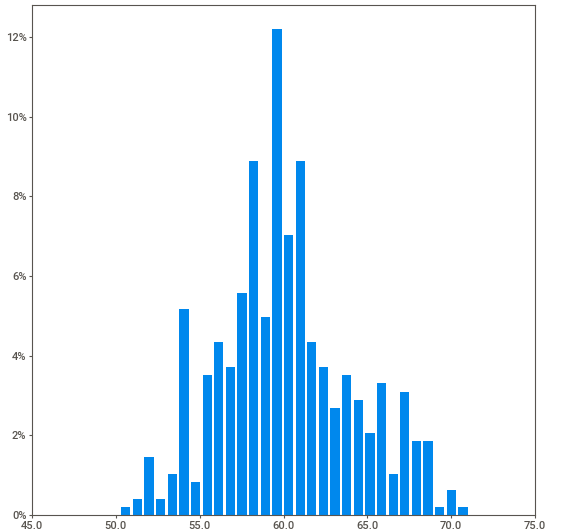
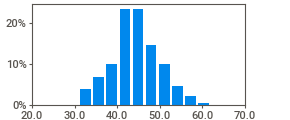
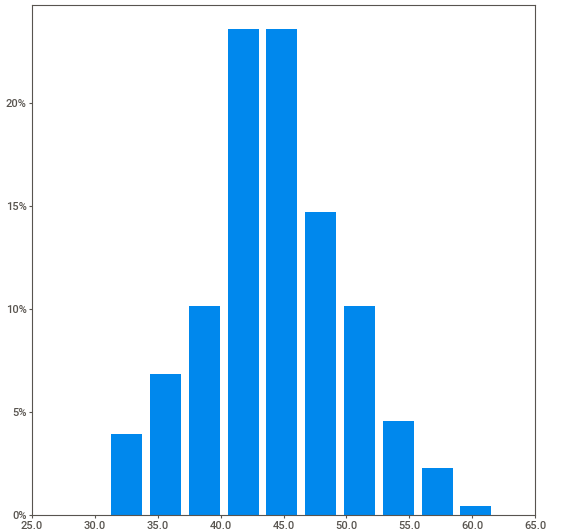
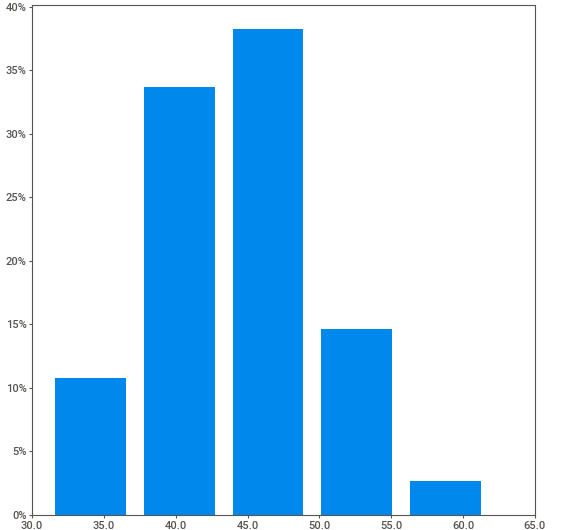
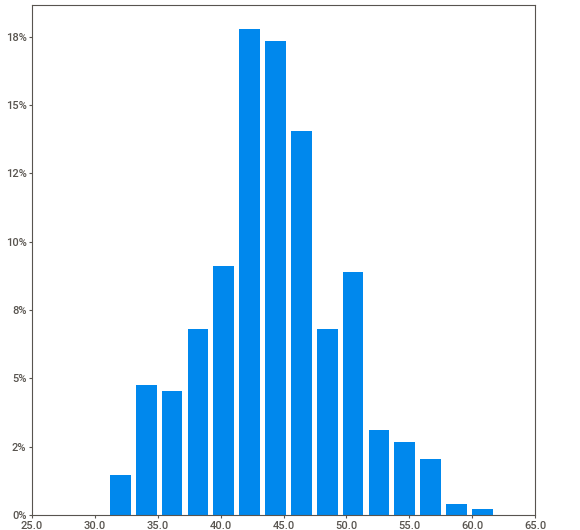
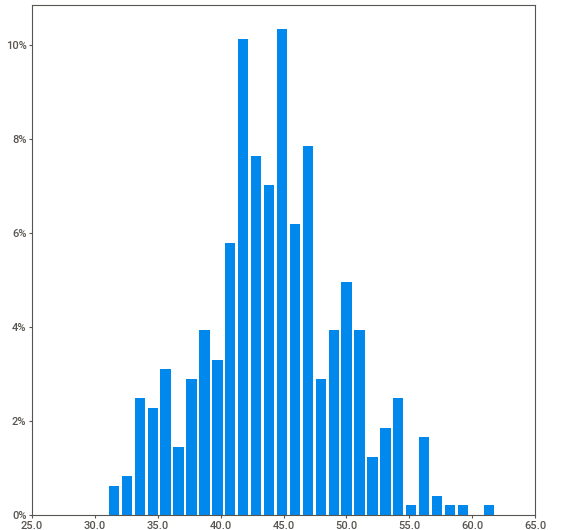
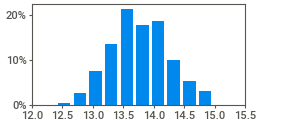
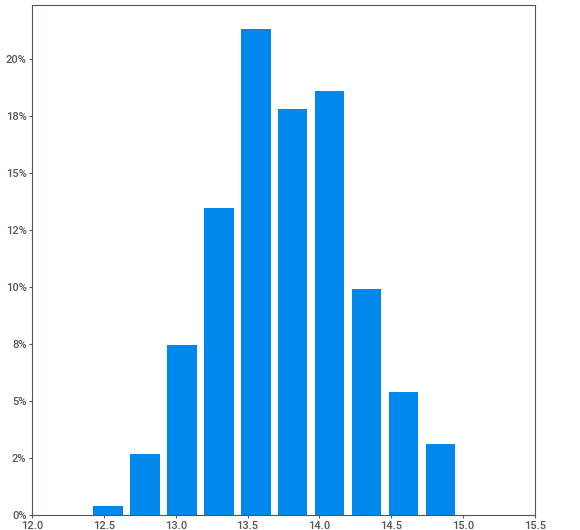
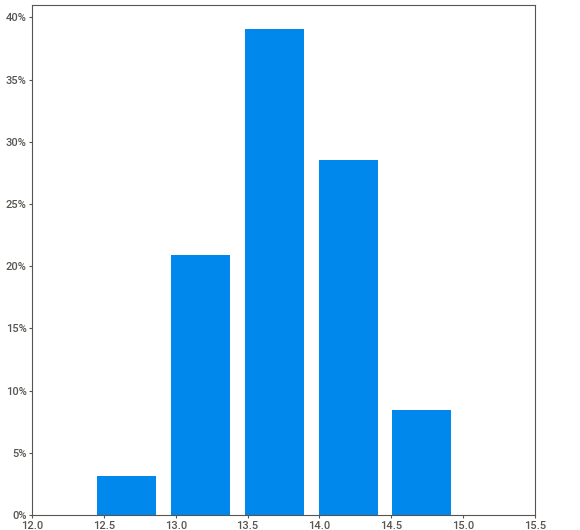
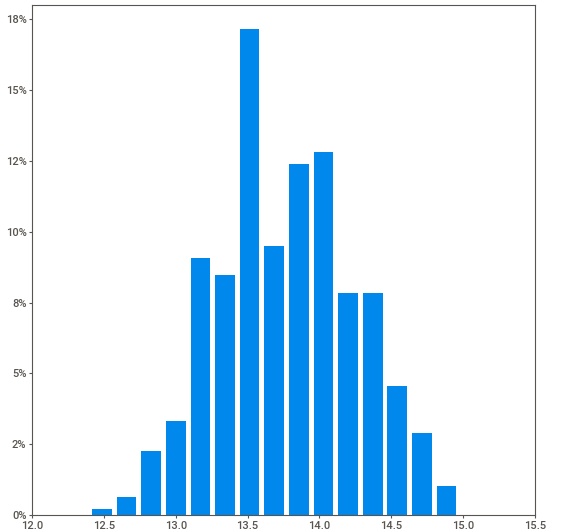
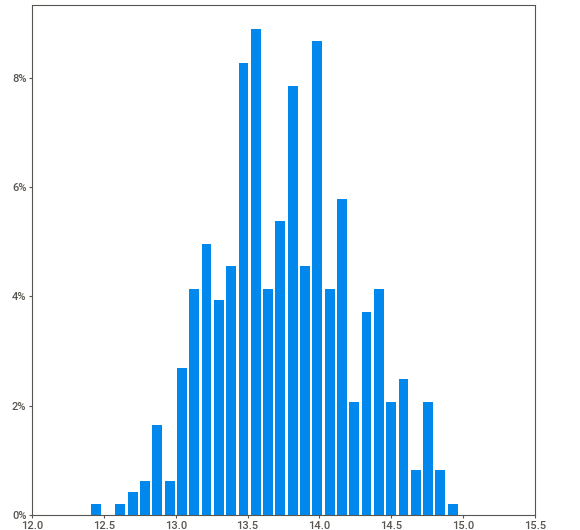
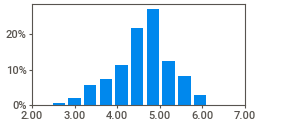
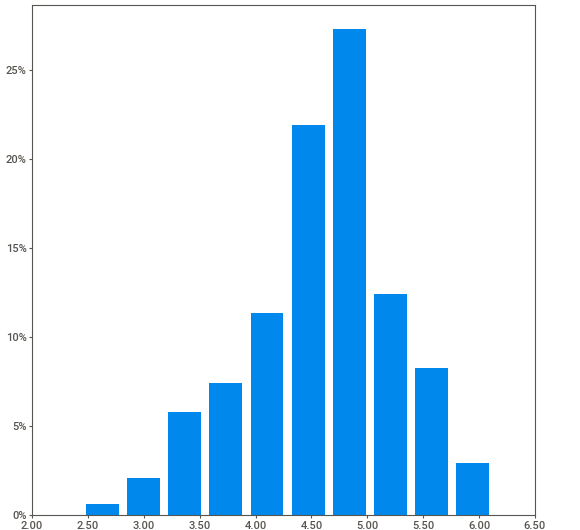
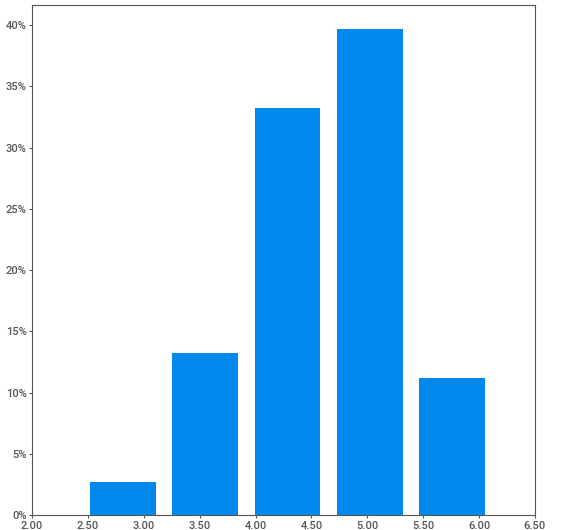
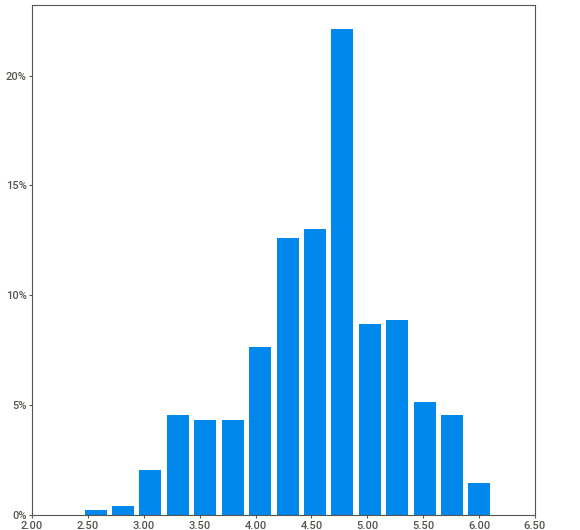
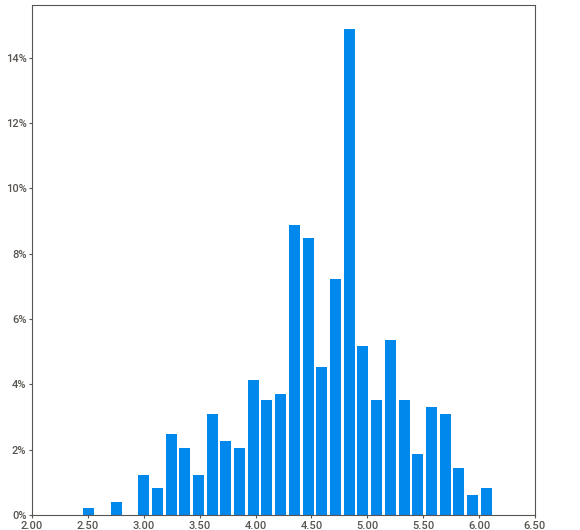
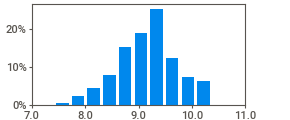
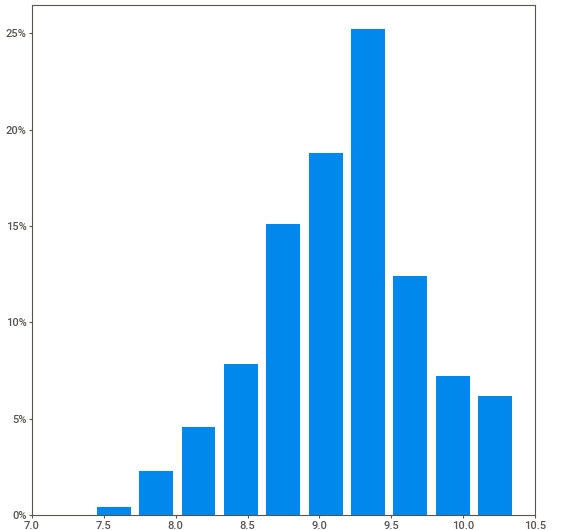
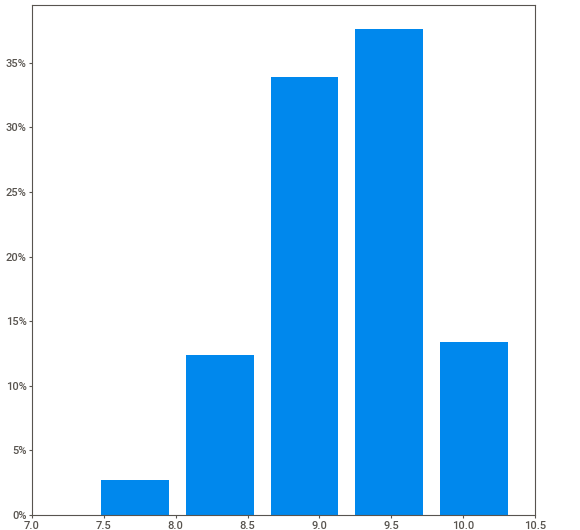
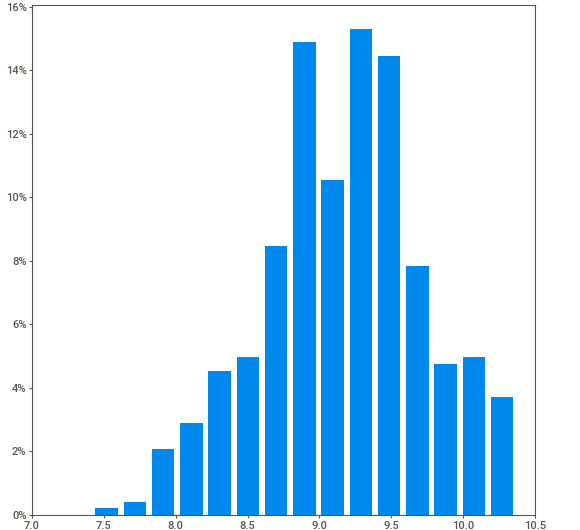
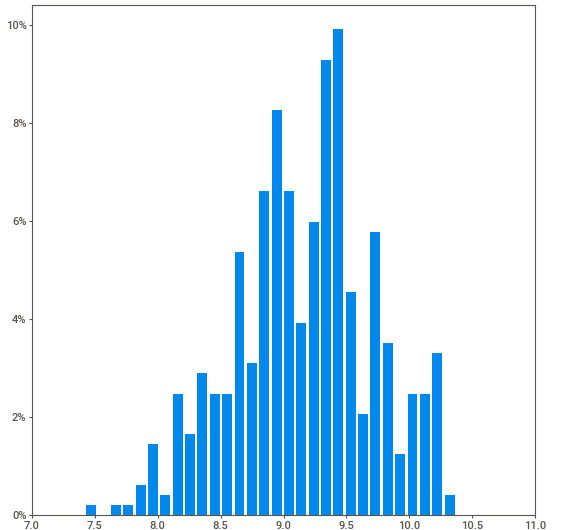
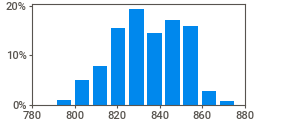
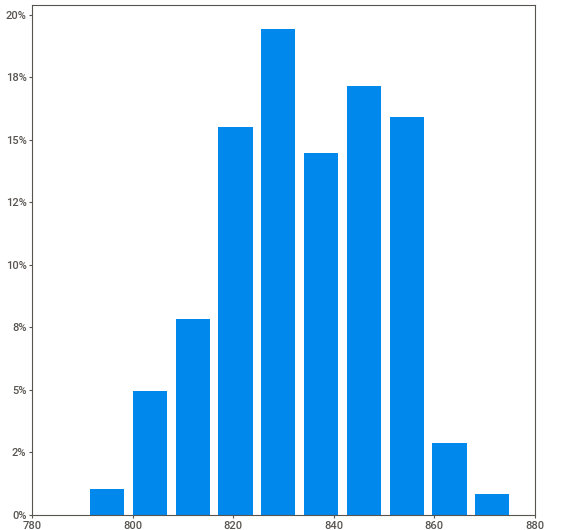
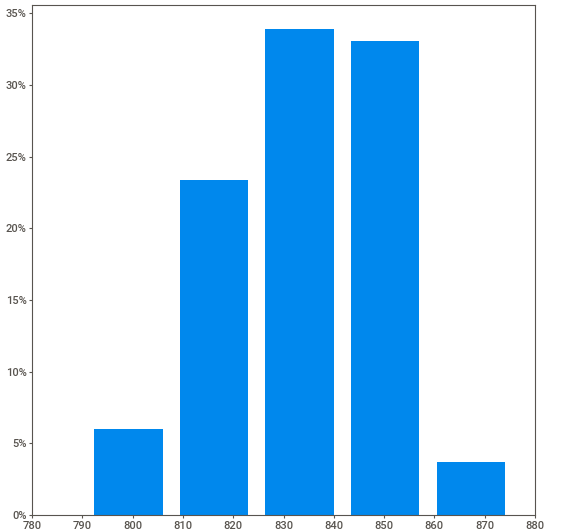
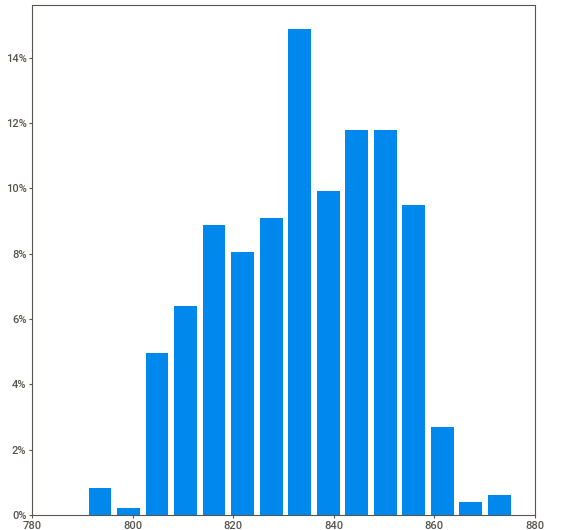
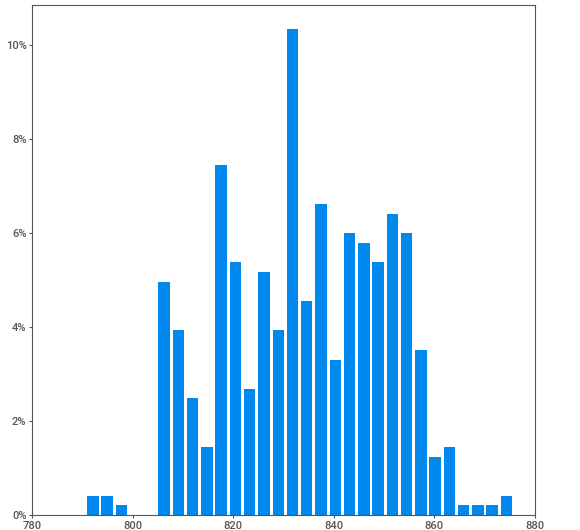
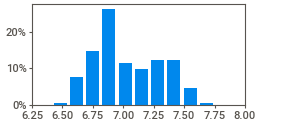
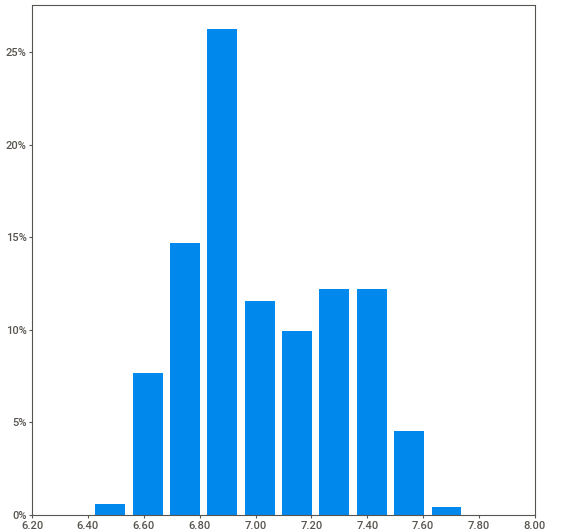
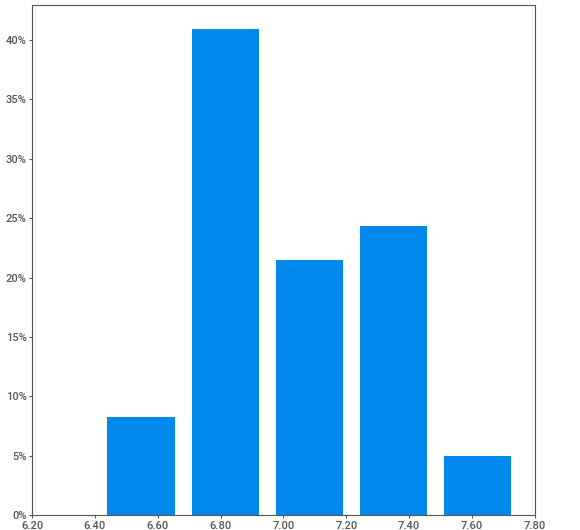
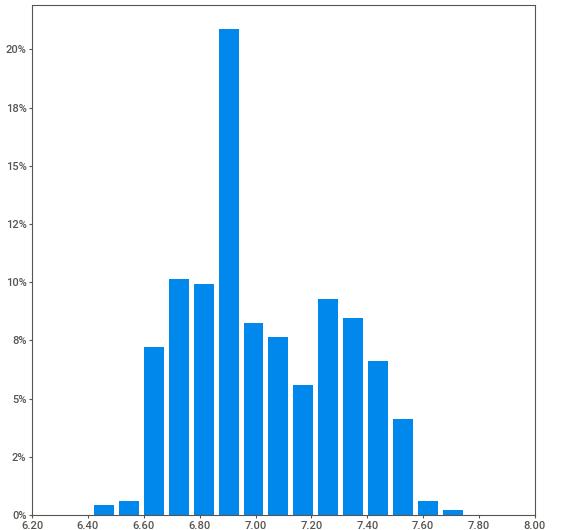
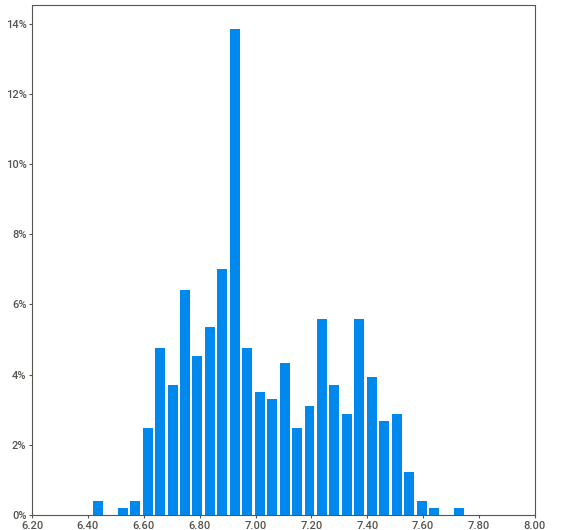
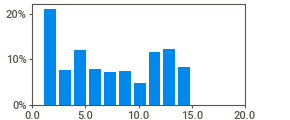
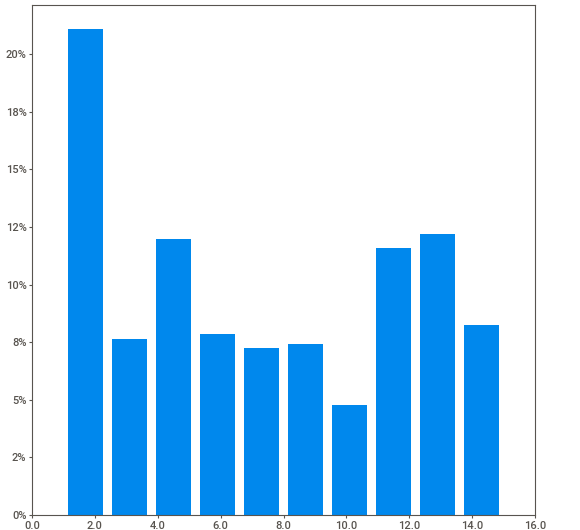
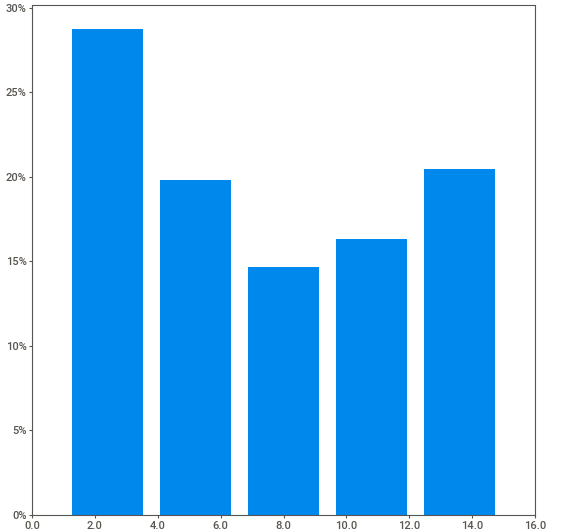
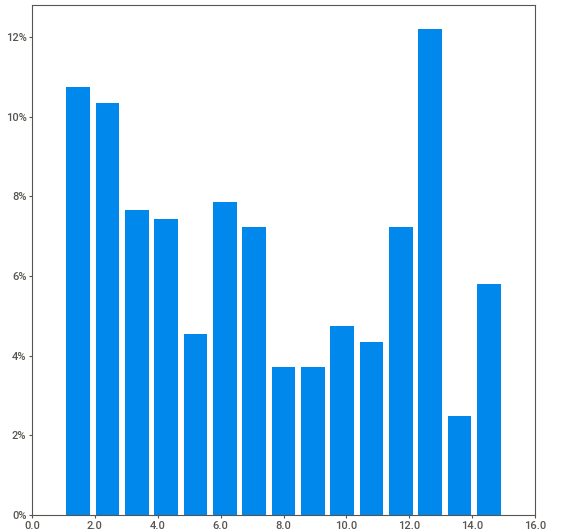
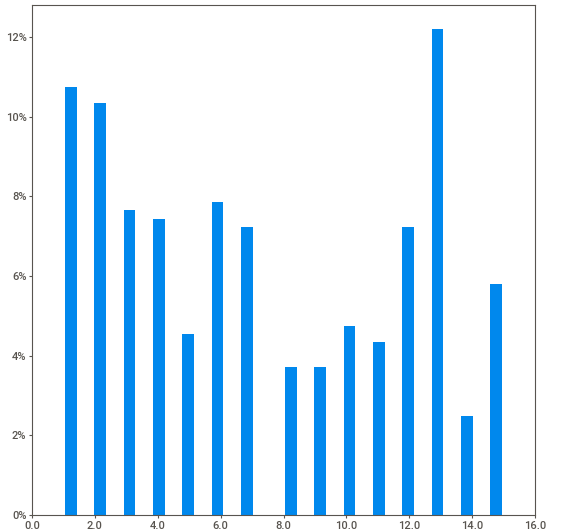
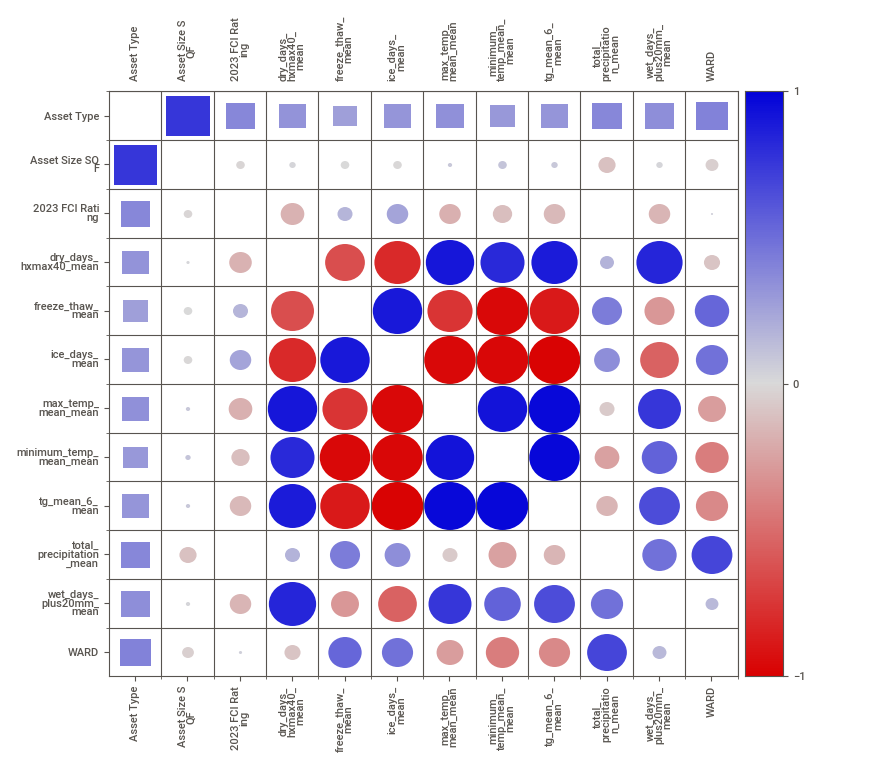
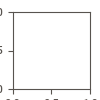

In [30]:
sv_report = sv.analyze(final_df) 
sv_report.show_notebook()

In [31]:
sv_report.show_html('exploration.html',open_browser=False)

Report exploration.html was generated.
